<a href="https://colab.research.google.com/github/arriagajorge/regularization-linearmodel/blob/main/ej11_rlxlasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’




In [5]:
install.packages("ISLR2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-4



In [6]:
library(ISLR2)

In [3]:
data("Boston")

Warning message in data("Boston"):
“data set ‘Boston’ not found”


Relax-LASSO

In [ ]:
RELAX-LASSO

In [115]:
n <- dim(Boston)[1]
x <- model.matrix(crim~.^2, Boston)[, -1] #input matrix, of dimension nobs x nvars
y <- Boston$crim #response variable

In [17]:
rlxLAsso <- cv.glmnet(x, y, nfolds = 10, alpha = 1, relax = T) 
val_lamda_rlxlasso <- rlxLAsso$relaxed$statlist$`g:0`$lambda #esto solo es para conseguir los valores de lambda

In [118]:
t0 = proc.time()
rlxlasso <- cv.glmnet(x, y, nfolds = 10, alpha = 1, relax = T)
proc.time() - t0

   user  system elapsed 
  8.412   0.028   8.456 

In [126]:
B <- 500
pb <- txtProgressBar(min = 0,      # Minimum value of the progress bar
                     max = B, # Maximum value of the progress bar
                     style = 3,    # Progress bar style (also available style = 1 and style = 2)
                     width = 50,   # Progress bar width. Defaults to getOption("width")
                     char = "=")   # Character used to create the bar

  |                                                  |   0%

In [127]:
M = list()
set.seed(11)
t0 <- proc.time()
for (i in 1:B){
  rlxLasso <- cv.glmnet(x, y, nfolds = 10, alpha = 1, relax = T)
  gamma0  <- rlxLasso$relaxed$statlist$`g:0`$cvm
  gamma25 <- rlxLasso$relaxed$statlist$`g:0.25`$cvm
  gamma5  <- rlxLasso$relaxed$statlist$`g:0.5`$cvm
  gamma75 <- rlxLasso$relaxed$statlist$`g:0.75`$cvm
  gamma1  <- rlxLasso$relaxed$statlist$`g:1`$cvm

  M[[i]] = data.frame(gamma0,gamma25,gamma5,gamma75,gamma1)

  setTxtProgressBar(pb, i)
}
proc.time() - t0
#    user   system  elapsed 
#4454.941   13.939 4474.003 

  |==================================================| 100%

    user   system  elapsed 
4454.941   13.939 4474.003 

In [132]:
#M[[1]]
M[[1]][100, 5]

[1] 35.09432

In [134]:
res = matrix(0, nrow = 100, ncol = 5)

In [135]:
for (row in 1:100){
    for (col in 1:5){
      for (i in 1:B){
        res[row, col] = res[row, col] + M[[i]][row, col]
    }
  }
}

In [136]:
res <- res/B

In [143]:
res <- as.data.frame(res)

In [145]:
colnames(res) <- c("gamma0", "gamma25", "gamma5", "gamma75", "gamma1")

In [147]:
which.min(res$gamma0)  #53
which.min(res$gamma25) #53
which.min(res$gamma5)  #65
which.min(res$gamma75) #66
which.min(res$gamma1)  #69

[1] 53

[1] 53

[1] 65

[1] 66

[1] 69

In [149]:
mins <- c(res$gamma0[53], res$gamma25[53], res$gamma5[65], res$gamma75[66],res$gamma1[69])
mins #34.411143196439134.517048064006634.652392248806834.617856612714434.6316156369787
which.min(mins)

[1] 34.41114 34.51705 34.65239 34.61786 34.63162

[1] 1

In [155]:
val_lambda_rlxlasso[53] #0.0461358479242896

[1] 0.04613585

In [156]:
# valor de lambda = 0.0461358479242896
# valor de gamma = 0
# valor minimo =  34.4111431964391

In [157]:
B <- 2000
pb <- txtProgressBar(min = 0,      # Minimum value of the progress bar
                     max = B, # Maximum value of the progress bar
                     style = 3,    # Progress bar style (also available style = 1 and style = 2)
                     width = 50,   # Progress bar width. Defaults to getOption("width")
                     char = "=")   # Character used to create the bar

  |                                                  |   0%

In [158]:
err_test <- rep(0, B)
set.seed(11)
t0 = proc.time()
for (i in 1:B){
  train <- sample(1:n, ntrain)
  rlxlasso_mod <- glmnet(x[train,], y[train], alpha = 1, relax = T)
  err_test[i] <- assess.glmnet(rlxlasso_mod,s=val_lambda_rlxlasso[53],gamma=0, newx = x[-train,], newy = y[-train])$mse
  setTxtProgressBar(pb,i)
}
proc.time()-t0
#    user   system  elapsed 
#1739.315    0.908 1746.543 

  |==================================================| 100%

    user   system  elapsed 
1739.315    0.908 1746.543 

In [189]:
mean(err_test) #35.2694554250068

[1] 35.26946

In [162]:
#error aparente
rlxlasso_mod2 <- glmnet(x, y, alpha = 1, relax = T)
assess.glmnet(rlxlasso_mod2,s=val_lambda_rlxlasso[53],gamma=0, newx = x, newy = y)$mse #31.374033683948

s1 
31.37403 
attr(,"measure")
[1] "Mean-Squared Error"

In [172]:
coef = predict.relaxed(rlxlasso_mod2, s=val_lambda_rlxlasso[53],gamma=0, newx = x, type="coefficients")

In [186]:
length(coef[coef != 0]) #26

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



[1] 26

RELAX 
If TRUE then for each active set in the path of solutions, the model is refit without any regularization. See details for more information. This argument is new, and users may experience convergence issues with small datasets, especially with non-gaussian families. Limiting the value of 'maxp' can alleviate these issues in some cases.

In [ ]:
Plots

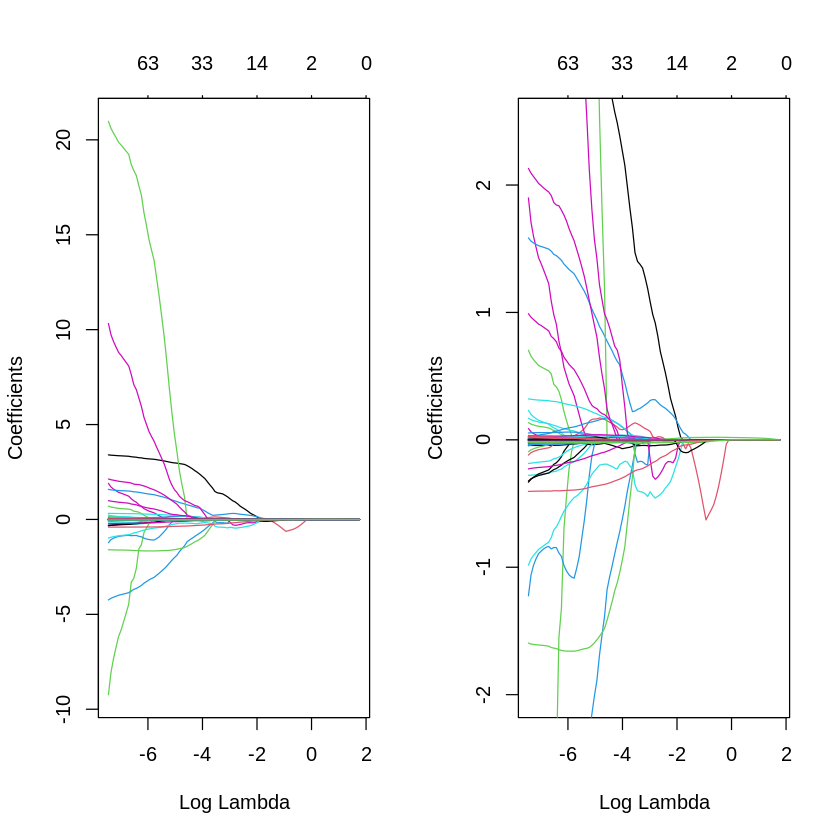

In [231]:
par(mfrow = c(1,2))
plot(rlxlasso_mod2)
plot(rlxlasso_mod2, ylim=c(-2,2.5))

In [232]:
pdf("coef_rlxlasso2.pdf", width = 14, height = 5)
par(mfrow = c(1,2))
plot(rlxlasso_mod2)
plot(rlxlasso_mod2, ylim=c(-2,2.5))
dev.off()

png 
  2

In [210]:
install.packages("latex2exp")
library(latex2exp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



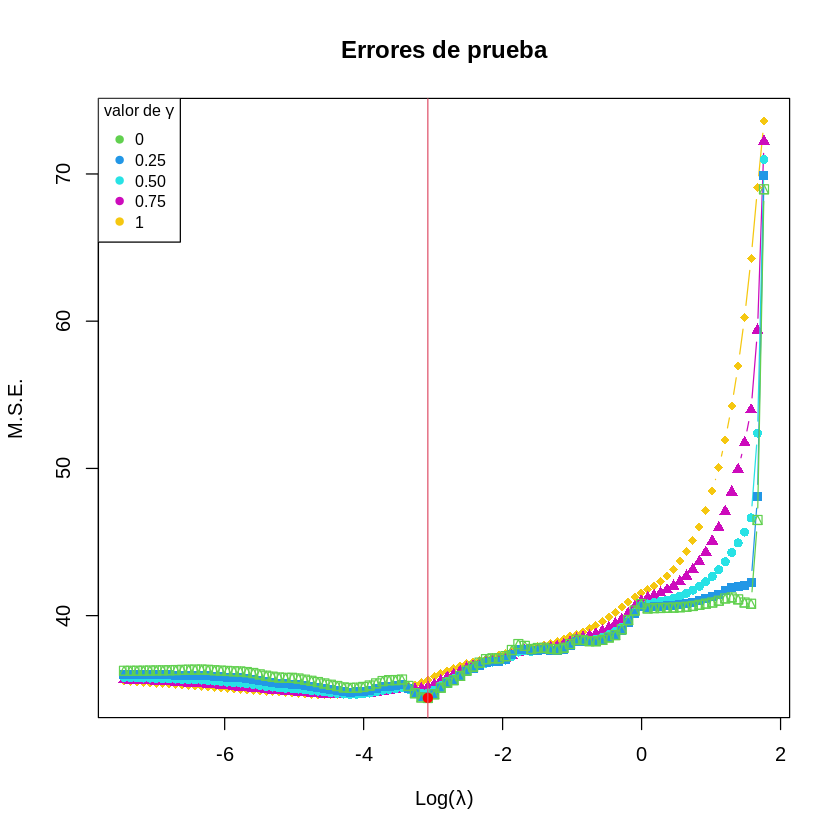

In [227]:
plot(log(val_lambda_rlxlasso),res[,5], type="b", pch=18, col=7, main="Errores de prueba", xlab = TeX("Log($\\lambda$)"), ylab="M.S.E.")
lines(log(val_lambda_rlxlasso), res[,4], type="b", pch=17, col=6)
lines(log(val_lambda_rlxlasso), res[,3], type="b", pch=16, col=5)
lines(log(val_lambda_rlxlasso), res[,2], type="b", pch=15, col=4)
lines(log(val_lambda_rlxlasso), res[,1], type="b", pch=14, col=3)
points(log(val_lambda_rlxlasso[53]),res$gamma0[53],col = "red", pch=19)
abline(v=log(val_lambda_rlxlasso[53]), col=2)

legend(
  x ="topleft",
  title=TeX("valor de $\\gamma$"),
  legend = c("0", "0.25", "0.50", "0.75", "1"), # for readability of legendç
  col = c(col=3, col=4, col=5, col=6, col=7),
  pch = 19, # same as pch=20, just smaller
  cex = .8 # scale the legend to look attractively sized
)

In [237]:
pdf("err_test_rlxlasso2.pdf", width = 8, height = 5)

plot(log(val_lambda_rlxlasso),res[,5], type="b", pch=18, col=7, main="Errores de prueba", xlab = TeX("Log($\\lambda$)"), ylab="M.S.E.")
lines(log(val_lambda_rlxlasso), res[,4], type="b", pch=17, col=6)
lines(log(val_lambda_rlxlasso), res[,3], type="b", pch=16, col=5)
lines(log(val_lambda_rlxlasso), res[,2], type="b", pch=15, col=4)
lines(log(val_lambda_rlxlasso), res[,1], type="b", pch=14, col=3)
points(log(val_lambda_rlxlasso[53]),res$gamma0[53],col = "red", pch=19)
abline(v=log(val_lambda_rlxlasso[53]), col=2)

legend(
  x ="topleft",
  title=TeX("valor de $\\gamma$"),
  legend = c("0", "0.25", "0.50", "0.75", "1"), # for readability of legendç
  col = c(col=3, col=4, col=5, col=6, col=7),
  pch = 19, # same as pch=20, just smaller
  cex = .8 # scale the legend to look attractively sized
)

dev.off()

png 
  2

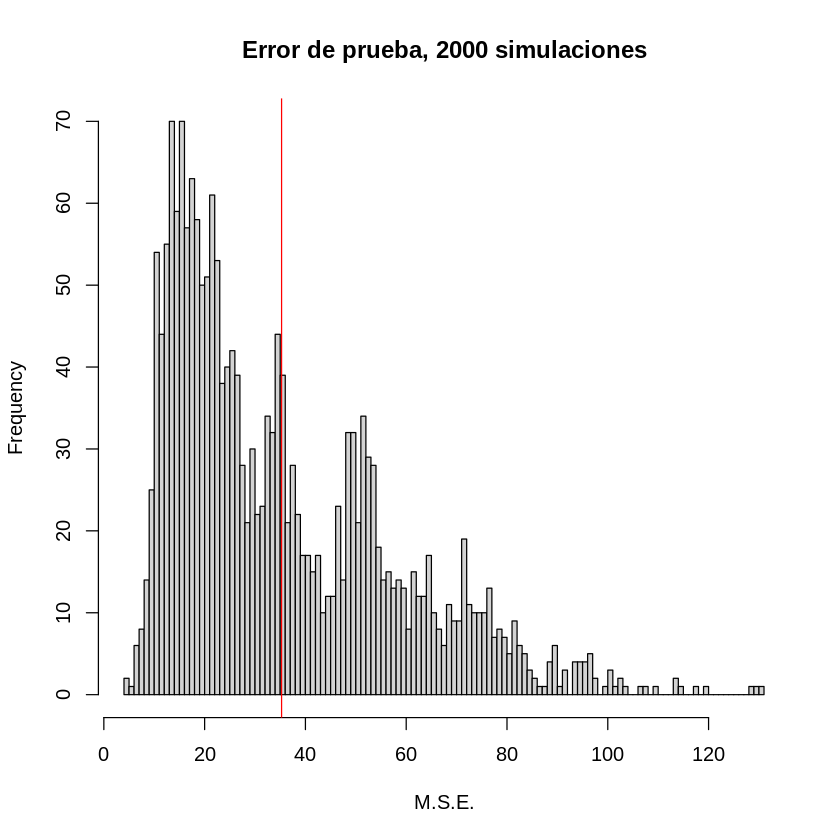

In [226]:
hist(err_test, breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.", freq = T)
abline(v = mean(err_test), col="red")

In [238]:
pdf("hist_rlxlasso2.pdf", width = 6, height = 5)

hist(err_test, breaks = 100, main="Error de prueba, 2000 simulaciones", xlab="M.S.E.", freq = T)
abline(v = mean(err_test), col="red")

dev.off()

png 
  2